In [1]:
import sys
sys.path.append("../02_src/02_lib/")
from matplotlib import pyplot as plt

from traffic_light import *

Tempo inicial da execucao: 2024-01-14 03:49:44.268704


### Primeira parte sem a parte gráfica, com a coleta de dados

In [2]:
STEP_TOTAL = 4000
ADD_PLATOON_STEP = 100
SEED = 58916456
sumo_cmd = ['sumo', 
            '--duration-log.statistics', 
            '-c', '../02_src/01_scenario/3_intelligent_intersection/set/twoWay6lanes.sumo.cfg']

In [3]:
intelligent_intersection = Intelligent_Intersection(SEED,ADD_PLATOON_STEP = ADD_PLATOON_STEP)
intelligent_intersection.start(sumo_cmd,STEP_TOTAL)

 Retrying in 1 seconds
***Starting server on port 53289 ***
Loading net-file from '../02_src/01_scenario/3_intelligent_intersection/set/twoWay6lanes.net.xml' ... done (2ms).
Loading done.
Simulation version 1.18.0 started with time: 0.00.
Step #40.00 (1ms ~= 10.00*RT, ~142000.00UPS, TraCI: 10ms, vehicles TOT 160 ACT 142 BUF 0) 
Simulation ended at time: 40.00
Reason: TraCI requested termination.
Performance: 
 Duration: 30.21s
 TraCI-Duration: 27.49s
 Real time factor: 1.32411
 UPS: 11049.289947
Vehicles: 
 Inserted: 160
 Running: 142
 Waiting: 0
Statistics (avg of 18):
 RouteLength: 890.73
 Speed: 25.60
 Duration: 34.85
 WaitingTime: 0.00
 TimeLoss: 2.22
 DepartDelay: 0.00



In [4]:
intelligent_intersection.seed

58916456

In [5]:
df = intelligent_intersection.veh_data.merge_veh_data()
df.head()

,step,key,route,odometry,speed,timeLoss,current_time,desired_speed,distance_to_stop_line,max_leaving_time,leaving_time,duration
0,1,v.0.8.0,8,0.000000,5.000000,0.000000,0.02,NaN,NaN,NaN,NaN,0.0
1,1,v.0.11.0,11,0.000000,5.000000,0.000000,0.02,NaN,NaN,NaN,NaN,0.0
2,11,v.0.8.0,8,0.501652,5.040697,0.069780,0.12,NaN,NaN,NaN,NaN,0.1
3,11,v.0.11.0,11,0.501652,5.040697,0.069780,0.12,NaN,NaN,NaN,NaN,0.1
4,21,v.0.8.0,8,1.011029,5.145943,0.139095,0.22,NaN,NaN,NaN,NaN,0.2


In [6]:
# Coleta de todos os veículos que ja ultrapassaram o semáforo
lista_veiculos_apos_semaforo = list(set(df.groupby(['key'])['key'].count().index) - set(intelligent_intersection.topology.keys()))

to_plot = df.query("key in "+str(lista_veiculos_apos_semaforo))

Total number of veh.: 24      
Average delay (s):[2.00365013]      
Variance:[0.89082901]


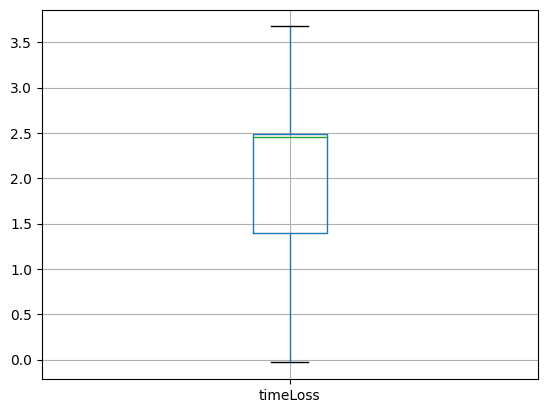

In [7]:
df_timeLoss  = to_plot.groupby(['key'])[['timeLoss']].last()
print("Total number of veh.: {}\
      \nAverage delay (s):{}\
      \nVariance:{}".format(len(df_timeLoss.index),df_timeLoss.mean().values,df_timeLoss.var().values))
ax = df_timeLoss.boxplot()
plt.show()

In [8]:
print("TimeLoss Negatigo:",len(df_timeLoss.query("timeLoss < 0")))

TimeLoss Negatigo: 1


DURATION 	 MAX [35.9] 	-	MIN [31.1]


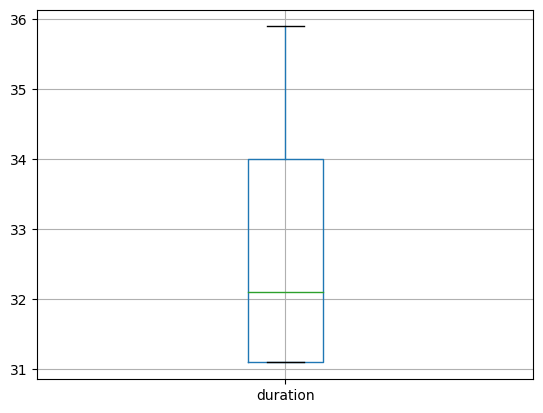

In [9]:
duration = to_plot.groupby(['key'])[['duration']].last()
print("DURATION \t MAX {} \t-\tMIN {}".format(duration.max().values,duration.min().values))
ax = to_plot.groupby(['key'])[['duration']].last().boxplot()
plt.show()

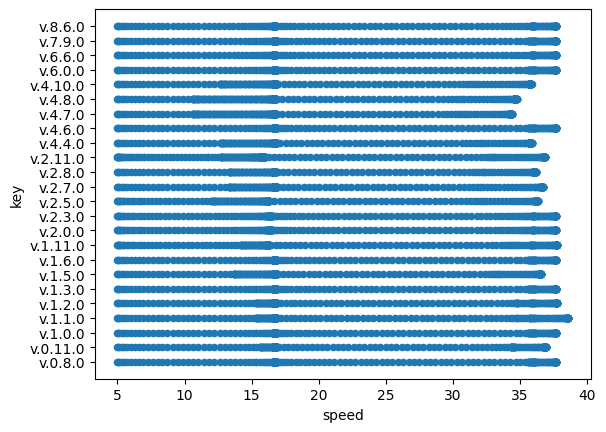

In [10]:
ax = to_plot[['key','speed']].plot(x='speed', y='key',kind='scatter')
plt.show()

In [11]:
print("Exemplo das variáveis:\
       \n\nserving_list =>[veh, route, leaving_time, priority]:\n{}\
       \n\nserving_list_veh_only:\n{}\
       \n\ntopology:\n{}\
       \n\nTotal de Passos:{}\
       ".format(intelligent_intersection.serving_list[0],
               intelligent_intersection.serving_list_veh_only[0],
               intelligent_intersection.topology.popitem(),
               intelligent_intersection.step))

Exemplo das variáveis:       

serving_list =>[veh, route, leaving_time, priority]:
['v.9.11.0', 11, 0.44521092264886447, 0]       

serving_list_veh_only:
v.9.11.0       

topology:
('v.39.11.0', {})       

Total de Passos:4000       


In [12]:
df.key.head()

0     v.0.8.0
1    v.0.11.0
2     v.0.8.0
3    v.0.11.0
4     v.0.8.0
Name: key, dtype: object

In [13]:
executionTime()

Tempo de execucao ate este ponto: 0:00:31.828067


### Segunda parte com interface gráfica do SUMO-GUI

In [14]:
sumo_cmd = ['sumo-gui', 
            '--duration-log.statistics', 
            '-c', '../02_src/01_scenario/3_intelligent_intersection/set/twoWay6lanes.sumo.cfg']
intelligent_intersection = Intelligent_Intersection(SEED)
intelligent_intersection.start(sumo_cmd,STEP_TOTAL)

 Retrying in 1 seconds
